# Tasks performed in project

1. EDA
2. some useful insights
3. content based recommendation system

# 1. Import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# 2. Load dataset

In [3]:
df = pd.read_csv("D:/ML & AI EDU/Tensorflow Lectures Udemy/titles.csv")
print("Dataset loaded...")

Dataset loaded...


# 3. EDA

In [4]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
df.shape

(5806, 15)

In [6]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [7]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [8]:
df = df.fillna(df.mean())

C:\Users\Sanchit\AppData\Local\Temp/ipykernel_15676/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [9]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  444
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5801    False
5802    False
5803    False
5804    False
5805    False
Length: 5806, dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               5806 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5806 non-null   float64
 12  imdb_votes            5806 non-null   float64
 13  tmdb_popularity       5806 non-null   float64
 14  tmdb_score            5806 non-null   float64
dtypes: float64(5), int64(

# 4. Data Visualisation

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

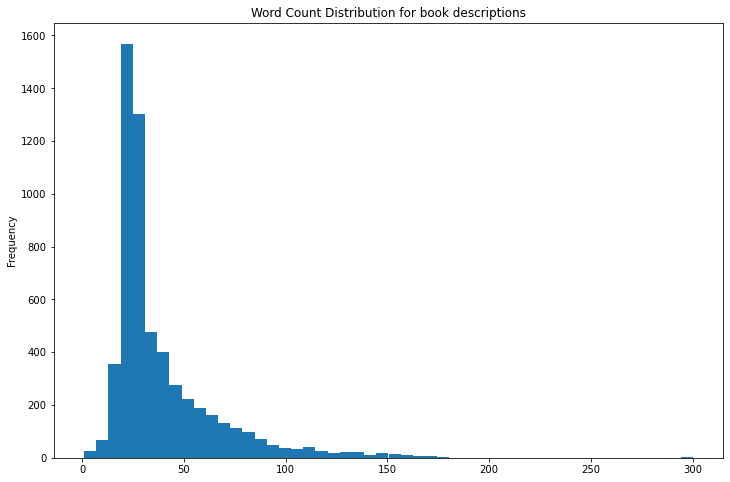

In [12]:
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

# bigram

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

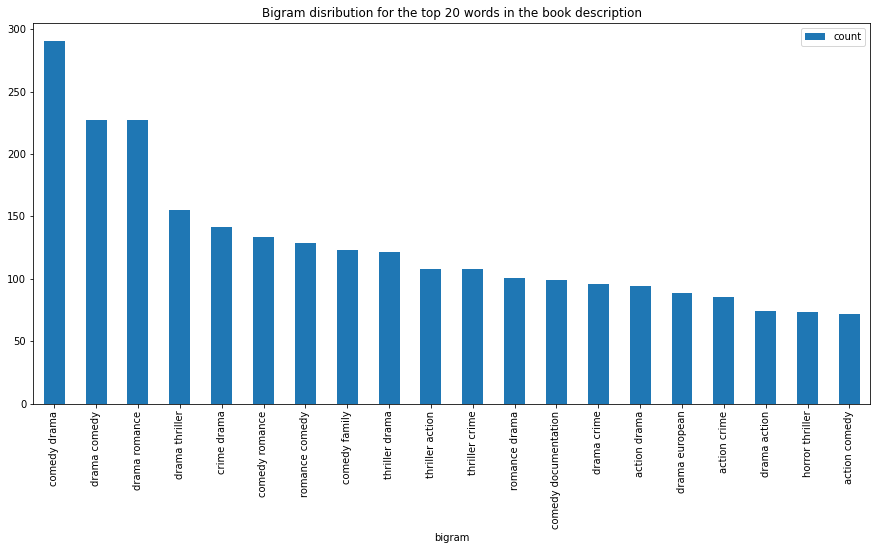

In [13]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['genres'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

# 5. Some Useful Insights

In [14]:
df[df['release_year'] > 2000]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,word_count
243,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.000000,tt0903747,9.500000,1.727694e+06,337.419,8.800000,56
244,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.000000,tt1520211,8.200000,9.451250e+05,773.190,8.100000,32
245,ts26091,The Staircase,SHOW,"Academy Award-winning documentary filmmaker, J...",2004,TV-MA,49,"['crime', 'documentation', 'drama']",['FR'],2.000000,tt0388644,7.800000,2.153100e+04,14.185,7.700000,95
246,ts11,Downton Abbey,SHOW,A chronicle of the lives of the aristocratic C...,2010,TV-14,58,"['drama', 'romance', 'european']",['GB'],6.000000,tt1606375,8.700000,1.977440e+05,57.029,8.100000,33
247,ts21469,Grey's Anatomy,SHOW,Follows the personal and professional lives of...,2005,TV-14,49,"['drama', 'romance']",['US'],18.000000,tt0413573,7.600000,2.936180e+05,1215.393,8.300000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],2.165608,tt13857480,6.900000,3.900000e+01,0.966,6.818039,15
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],2.165608,NaN,6.533447,2.340719e+04,1.036,8.500000,9
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",2.165608,tt14620732,6.500000,3.200000e+01,0.709,6.818039,26
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],2.165608,tt10168094,6.200000,9.000000e+00,2.186,6.818039,20


In [15]:
df[df['type'] == 'SHOW']['release_year']

0       1945
5       1969
29      1972
47      1989
55      1982
        ... 
5793    2021
5794    2021
5796    2021
5799    2021
5805    2021
Name: release_year, Length: 2047, dtype: int64

All tvshows with their realease years

In [17]:
df[(df['type']=='SHOW') & (df['age_certification']=='TV-MA')][['title','runtime']] \
  .sort_values(by=['runtime'],ascending=False)

,title,runtime
3268,The Hateful Eight: Extended Version,199
3828,1994,178
388,Dead Set,141
2390,The Yard,108
1476,Intersection,97
...,...,...
4008,The Forest of Love: Deep Cut,0
5213,Savage Beauty,0
4776,I'm with the Band: Nasty Cherry,0
896,Masameer,0


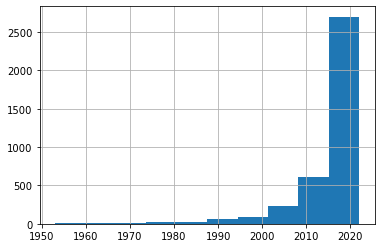

In [18]:
df[df['type'] == "MOVIE"]['release_year'].hist()
plt.show()

maximum movies realesed between 2015 to 2021 on netflix

In [19]:
df[df['seasons'] >3]['type'].value_counts()

SHOW    305
Name: type, dtype: int64

there are 305 tv shows having more then 3 seasons

# 6. Content Based Recommendation System

we choose description feature for finding similarities in content

In [20]:
df.head(1)['description']

0    This collection includes 12 World War II-era p...
Name: description, dtype: object

In [21]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3),strip_accents= "unicode" ,min_df=3, stop_words='english')
df['description'] = df['description'].fillna("")
tfidf_matrix = tf.fit_transform(df['description'])

In [22]:
tfidf_matrix

<5806x9285 sparse matrix of type '<class 'numpy.float64'>'
	with 110729 stored elements in Compressed Sparse Row format>

In [23]:
tfidf_matrix.shape

(5806, 9285)

In [24]:
sig = sigmoid_kernel(tfidf_matrix,tfidf_matrix)

In [25]:
sig[0]

array([0.76163938, 0.76159546, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [26]:
indices= pd.Series(df.index,index=df['title']).drop_duplicates()

In [27]:
indices

title
Five Came Back: The Reference Films       0
Taxi Driver                               1
Monty Python and the Holy Grail           2
Life of Brian                             3
The Exorcist                              4
                                       ... 
Fine Wine                              5801
Edis Starlight                         5802
Clash                                  5803
Shadow Parties                         5804
Mighty Little Bheem: Kite Festival     5805
Length: 5806, dtype: int64

In [28]:
def give_rec(title, sig=sig):
    idx = indices[title]
    
    sig_scores = list(enumerate(sig[idx]))
    
    sig_scores = sorted(sig_scores,key=lambda x: x[1],reverse = True)
    
    sig_scores = sig_scores[1:11]
    
    movie_indices = [i[0] for i in sig_scores]
    
    return df['title'].iloc[movie_indices]

In [29]:
give_rec('Fine Wine')

673                                             Fida
4692                                        Soulmate
5565                          Most Eligible Bachelor
450                                     Jodhaa Akbar
1820                                 Love Is a Story
3150                                Ascharya Fuck It
2979                                    Solo el amor
5661    Making Malinche: A Documentary by Nacho Cano
2783                                        Love.com
5394                          Why Are You Like This?
Name: title, dtype: object

we recommend movies to user based on similarities in description

sigmoid method is used to find similarities

extract some useful information